In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle, os, math
from parameters import *

font_size = 14
fig_size = (4,3)
line_size = 2.0

print(lambda_prob)

0.003


In [33]:
def prob_func(func_total_time):
    return 1 - math.exp(- func_total_time* lambda_prob)
def get_data(intensity =0.02, v_num=20, length = 5000, h_min = 0.2):
    # parameter
    intensity_name = 'intensity '+ str(intensity)
    v_num_name = 'v num '+ str(v_num)
    length_name = 'length '+str(length)
    h_min_name = 'H_MIN '+str(h_min)
    
    folder_list = sorted(os.listdir(os.getcwd()))
    # fig, ax = plt.subplots()
    # ax2 = ax.twinx()
    color_list = ['r', 'g','b', 'C0']
    k = 0
    
    latency_cdf_list = {'pso': [], 'fpsomr':[], 'least': []}
    fail_prob_cdf_list = {'pso': [], 'fpsomr':[], 'least': []}
    repeated_list = {'pso': [], 'fpsomr':[], 'least': []}
    
    for folder_name in folder_list:
        folder_name_temp = folder_name.split(', ')
        if len(folder_name_temp)<4: continue
        if folder_name_temp[0] == intensity_name and folder_name_temp[1] == v_num_name and folder_name_temp[2] == length_name and folder_name_temp[4] == h_min_name:
            # print(folder_name)
            finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
            with open(finished_tasks_file_name,'rb') as file1:
                finished_tasks = pickle.loads(file1.read())         
            tk_id_list = []
            tk_time_list = []
            tk_prob_list = []
            tk_reapted_list = []
            # for i, tk in enumerate(all_tasks): # since not all tasks are finished
            #     tk_id_list.append(tk.tid)
            #     tk_time_list.append(1000000)
            for i, tk in enumerate(finished_tasks):
                # print('count%s, tid %s' %(i+1, tk.tid))
                if not tk.tid in tk_id_list:
                    tk_id_list.append(tk.tid)
                    tk_time_list.append(0)
                    tk_prob_list.append(1)
                    tk_reapted_list.append(0)
            
            # print(len(tk_id_list))
            # print('duplicate number ',len(finished_tasks)/len(tk_id_list))
            
            for i, f_tk in enumerate(finished_tasks):
                for j, tkid in enumerate(tk_id_list):
                    if f_tk.tid == tkid:
                        tk_prob_list[j] *= prob_func(f_tk.total_time)
                        # if f_tk.total_time < tk_time_list[j]:
                        tk_time_list[j] += f_tk.total_time
                        tk_reapted_list[j] += 1
            pass
            
            for j in range(len(tk_time_list)):
                tk_time_list[j] = tk_time_list[j]/tk_reapted_list[j]
            
            mode_name = folder_name_temp[3].split(' ')[1]
            latency_cdf_list[mode_name] = tk_time_list
            fail_prob_cdf_list[mode_name]= tk_prob_list
            repeated_list[mode_name]= tk_reapted_list

            k+=1

    return latency_cdf_list, fail_prob_cdf_list, repeated_list

intensity =0.02

v_num=20
length = 5000
h_min = 0.2

# show_prob_cdf_figure(intensity, v_num, length, h_min)

latency_cdf_list, fail_prob_cdf_list,_ = get_data(intensity, v_num, length, h_min)


194.8307426597582 229.88883161512027 293.42783505154637
0.1525001832801356
0.3360181980501873
done
done


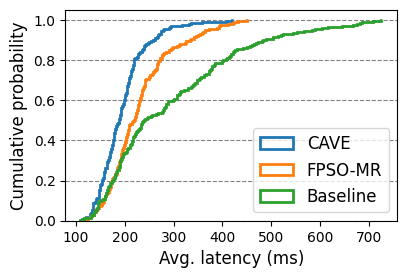

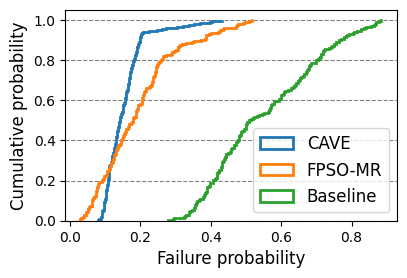

In [11]:
intensity =0.02
v_num=20
length = 10000
h_min = 0.2

latency_cdf_list, fail_prob_cdf_list,_ = get_data(intensity, v_num, length, h_min)
x = np.mean(latency_cdf_list['pso'])
y = np.mean(latency_cdf_list['fpsomr'])
z = np.mean(latency_cdf_list['least'])

print(x,y,z)
print(1- x/y)
print(1- x/z)

################## plot cdf of Delay #######

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, matplotlib.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

###############################################################


fig, ax = plt.subplots(figsize=fig_size)
plt.hist(np.array(latency_cdf_list['pso']), bins=300,cumulative=True, density=True, label='CAVE', histtype='step',  color='C0',linewidth=line_size)
plt.hist(np.array(latency_cdf_list['fpsomr']), bins=300,cumulative=True, density=True, label='FPSO-MR', histtype='step',  color='C1',linewidth=line_size)
plt.hist(np.array(latency_cdf_list['least']), bins=300,cumulative=True, density=True, label='Baseline', histtype='step',  color='C2',linewidth=line_size)

fix_hist_step_vertical_line_at_end(ax)

plt.legend(prop=dict(size=font_size-2),loc='lower right')
plt.xlabel('Avg. latency (ms)',fontsize=font_size-2)
plt.ylabel('Cumulative probability',fontsize=font_size-2)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='y',color='gray')
# plt.xlim(0,2000)
plt.subplots_adjust(left=0.135, bottom=0.237, right=0.965, top=0.940) # adjust when plt.show() and copy to here

# plt.show()
plt.savefig("results_/main_latency.pdf", format = 'pdf', dpi=300)
print('done')


###############################################################


fig, ax = plt.subplots(figsize=fig_size)
plt.hist(np.array(fail_prob_cdf_list['pso']), bins=300,cumulative=True, density=True, label='CAVE', histtype='step',  color='C0',linewidth=line_size)
plt.hist(np.array(fail_prob_cdf_list['fpsomr']), bins=300,cumulative=True, density=True, label='FPSO-MR', histtype='step',  color='C1',linewidth=line_size)
plt.hist(np.array(fail_prob_cdf_list['least']), bins=300,cumulative=True, density=True, label='Baseline', histtype='step',  color='C2',linewidth=line_size)

fix_hist_step_vertical_line_at_end(ax)

plt.legend(prop=dict(size=font_size-2),loc='lower right')
plt.xlabel('Failure probability',fontsize=font_size-2)
plt.ylabel('Cumulative probability',fontsize=font_size-2)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='y',color='gray')
# plt.xlim(0,2000)
plt.subplots_adjust(left=0.135, bottom=0.237, right=0.965, top=0.940) # adjust when plt.show() and copy to here

# plt.show()
plt.savefig("results_/main_failure.pdf", format = 'pdf', dpi=300)
print('done')



{'pso': [186.72875816993462, 199.29957805907173, 202.30673758865248, 205.53160919540227, 221.99756690997566], 'fpsomr': [203.69607843137254, 220.54273504273507, 240.63070175438594, 226.19321533923306, 248.64628297362106], 'least': [273.7647058823529, 328.32, 300.2043010752688, 298.9298245614035, 336.1119402985075]} {'pso': [0.15069176832304085, 0.16704855568421367, 0.15365547336392896, 0.16336625643618585, 0.1812277808954267], 'fpsomr': [0.17465967539733465, 0.1935052988231747, 0.20553893557787115, 0.1712668489258657, 0.1962135875494675], 'least': [0.5247002344473123, 0.5408543042989344, 0.5537897633237135, 0.5551696664293633, 0.5791179956020467]}
done
done


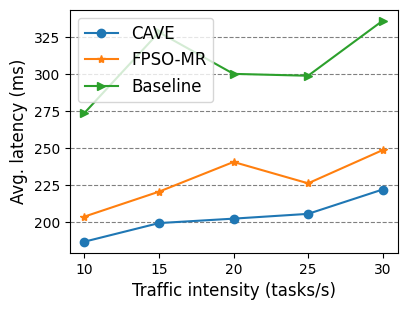

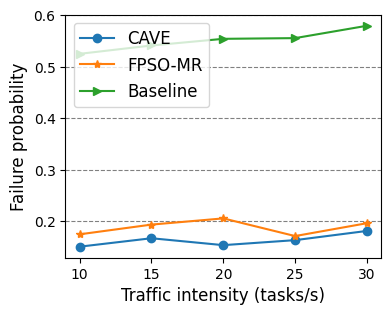

In [16]:
intensity_list = [ 0.01,0.015,0.02,0.025,0.03 ]
v_num=20
length = 5000
h_min = 0.2
latency = {'pso': [], 'fpsomr':[], 'least': []}
fail = {'pso': [], 'fpsomr':[], 'least': []}
for intensity in intensity_list:
    latency_cdf_list, fail_prob_cdf_list,_ = get_data(intensity, v_num, length, h_min)
    for mode_name in latency_cdf_list:
        # print(mode_name, latency_cdf_list[mode_name])
        ave_latency = np.sum(latency_cdf_list[mode_name])/len(latency_cdf_list[mode_name])
        ave_fail_prob = np.sum(fail_prob_cdf_list[mode_name])/len(fail_prob_cdf_list[mode_name])
        latency[mode_name].append(ave_latency)
        fail[mode_name].append(ave_fail_prob)

print(latency, fail)

fig, ax = plt.subplots(figsize=fig_size)

ranges = [10, 15, 20, 25, 30]
ax.plot(ranges,latency['pso'], marker='o',label='CAVE')
ax.plot(ranges,latency['fpsomr'], marker='*',label='FPSO-MR')
ax.plot(ranges,latency['least'], marker='>',label='Baseline')
ax.set_ylabel('Avg. latency (ms)', fontsize=font_size-2)
# ax2.bar(ranges-0.1, usage, align='center', color='C1', width=0.2, alpha=0.8)
# ax2.set_ylim(0.5, 2.0)

# ax.set_axisbelow(True)
ax.set_xlabel('Traffic intensity (tasks/s)',fontsize=font_size-2)
# plt.xticks(ranges, labels)
plt.legend(prop=dict(size=font_size-2),loc='upper left')

plt.grid(which='both',linestyle='--',axis='y',color='gray') # zorder=0, 
plt.tight_layout()
plt.subplots_adjust(left=0.16, bottom=0.17, right=0.98, top=0.98) # adjust when plt.show() and copy to here

# plt.show()
plt.savefig("results_/intensity_latency.pdf", format = 'pdf', dpi=300)
print('done')


fig, ax = plt.subplots(figsize=fig_size)

ranges = [10, 15, 20, 25, 30]
ax.plot(ranges,fail['pso'], marker='o',label='CAVE')
ax.plot(ranges,fail['fpsomr'], marker='*',label='FPSO-MR')
ax.plot(ranges,fail['least'], marker='>',label='Baseline')
ax.set_ylabel('Failure probability', fontsize=font_size-2)
# ax2.bar(ranges-0.1, usage, align='center', color='C1', width=0.2, alpha=0.8)
# ax2.set_ylim(0.5, 2.0)

# ax.set_axisbelow(True)
ax.set_xlabel('Traffic intensity (tasks/s)',fontsize=font_size-2)
# plt.xticks(ranges, labels)
plt.legend(prop=dict(size=font_size-2),loc='upper left')

plt.grid(which='both',linestyle='--',axis='y',color='gray') # zorder=0, 
plt.tight_layout()
plt.subplots_adjust(left=0.19, bottom=0.17, right=0.98, top=0.98) # adjust when plt.show() and copy to here

# plt.show()
plt.savefig("results_/intensity_failure.pdf", format = 'pdf', dpi=300)
print('done')


['intensity 0.02', 'v num 20', 'length 5000', 'mode pso', 'H_MIN 0.1']
['intensity 0.02', 'v num 20', 'length 5000', 'mode fpsomr', 'H_MIN 0.1']
['intensity 0.02', 'v num 20', 'length 5000', 'mode pso', 'H_MIN 0.2']
['intensity 0.02', 'v num 20', 'length 5000', 'mode fpsomr', 'H_MIN 0.2']
['intensity 0.02', 'v num 20', 'length 5000', 'mode pso', 'H_MIN 0.3']
['intensity 0.02', 'v num 20', 'length 5000', 'mode fpsomr', 'H_MIN 0.3']
['intensity 0.02', 'v num 20', 'length 5000', 'mode pso', 'H_MIN 0.4']
['intensity 0.02', 'v num 20', 'length 5000', 'mode fpsomr', 'H_MIN 0.4']
{'pso': [217.30496453900707, 202.30673758865248, 201.7659574468085, 198.03157894736842], 'fpsomr': [222.3543859649123, 240.63070175438594, 232.59219858156033, 234.35]} {'pso': [0.11669397405076144, 0.15365547336392896, 0.20799681526270955, 0.28803512815330745], 'fpsomr': [0.163327839327872, 0.20553893557787115, 0.21136807224624968, 0.2210768122723804]}
done


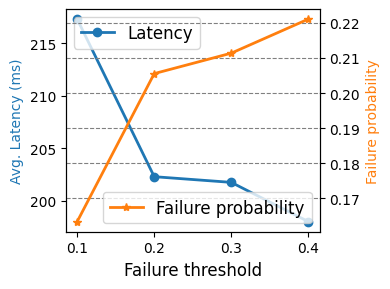

In [28]:
def get_data_by_mode(intensity =0.02, v_num=20, length = 5000, mode = 'pso', h_min = 0.2):
    # parameter
    intensity_name = 'intensity '+ str(intensity)
    v_num_name = 'v num '+ str(v_num)
    length_name = 'length '+str(length)
    h_min_name = 'H_MIN '+str(h_min)
    mode_name = 'mode '+mode
    folder_list = sorted(os.listdir(os.getcwd()))
    
    latency_cdf_list = {mode: []}
    fail_prob_cdf_list = {mode: []}
    
    for folder_name in folder_list:
        folder_name_temp = folder_name.split(', ')
        if len(folder_name_temp)<4: continue
        if folder_name_temp[0] == intensity_name and folder_name_temp[1] == v_num_name \
            and folder_name_temp[2] == length_name and folder_name_temp[3] == mode_name \
            and folder_name_temp[4] == h_min_name:
            print(folder_name_temp)
            finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
            with open(finished_tasks_file_name,'rb') as file1:
                finished_tasks = pickle.loads(file1.read())         
            tk_id_list = []
            tk_time_list = []
            tk_prob_list = []
            tk_reapted_list = []
            # for i, tk in enumerate(all_tasks): # since not all tasks are finished
            #     tk_id_list.append(tk.tid)
            #     tk_time_list.append(1000000)
            for i, tk in enumerate(finished_tasks):
                # print('count%s, tid %s' %(i+1, tk.tid))
                if not tk.tid in tk_id_list:
                    tk_id_list.append(tk.tid)
                    tk_time_list.append(0)
                    tk_prob_list.append(1)
                    tk_reapted_list.append(0)
            
            # print(len(tk_id_list))
            # print('duplicate number ',len(finished_tasks)/len(tk_id_list))
            
            for i, f_tk in enumerate(finished_tasks):
                for j, tkid in enumerate(tk_id_list):
                    if f_tk.tid == tkid:
                        tk_prob_list[j] *= prob_func(f_tk.total_time)
                        # if f_tk.total_time < tk_time_list[j]:
                        tk_time_list[j] += f_tk.total_time
                        tk_reapted_list[j] += 1

            for j in range(len(tk_time_list)):
                tk_time_list[j] = tk_time_list[j]/tk_reapted_list[j]
            
            latency_cdf_list[mode] = tk_time_list
            fail_prob_cdf_list[mode]= tk_prob_list

    return latency_cdf_list, fail_prob_cdf_list

h_min_list = [0.1, 0.2, 0.3, 0.4]

intensity = 0.02
v_num=20
length = 5000
h_min = 0.2
latency = {'pso': [], 'fpsomr':[]}
fail = {'pso': [], 'fpsomr':[]}
for h_min in h_min_list:
    for mode in ['pso','fpsomr']:
        latency_cdf_list, fail_prob_cdf_list = get_data_by_mode(intensity, v_num, length,mode, h_min)
        ave_latency = np.sum(latency_cdf_list[mode])/len(latency_cdf_list[mode])
        ave_fail_prob = np.sum(fail_prob_cdf_list[mode])/len(fail_prob_cdf_list[mode])
        latency[mode].append(ave_latency)
        fail[mode].append(ave_fail_prob)

print(latency, fail)
fig, ax = plt.subplots(figsize=fig_size)

ax.plot(h_min_list, latency['pso'], label='Latency', color='C0',marker='o', linewidth=line_size)
ax.set_ylabel('Avg. Latency (ms)', color='C0')
ax.legend(prop=dict(size=font_size-2),loc='upper left')

ax2 = ax.twinx()
ax2.plot(h_min_list, fail['fpsomr'], label='Failure probability', color='C1',marker='*', linewidth=line_size)
ax2.set_ylabel('Failure probability', color='C1')
ax2.legend(prop=dict(size=font_size-2),loc='lower right')

ax.set_xlabel('Failure threshold',fontsize=font_size-2)
plt.grid(which='both',linestyle='--',axis='y',color='gray') # zorder=0, 
plt.tight_layout()
# plt.subplots_adjust(left=0.19, bottom=0.17, right=0.98, top=0.98) # adjust when plt.show() and copy to here

# plt.show()
plt.savefig("results_/threshold.pdf", format = 'pdf', dpi=300)
print('done')

{'pso': [2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2], 'fpsomr': [2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 5, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2

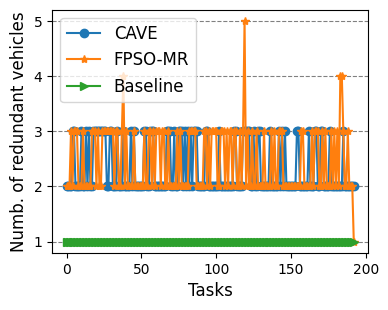

In [42]:
intensity=0.02
v_num = 20
length = 10000
h_min = 0.2
_, _, repeated_list = get_data(intensity, v_num, length, h_min)
print(repeated_list)
fig, ax = plt.subplots(figsize=fig_size)
max_length = 100000000000
for name in repeated_list:
    # print(len(repeated_list[name]))
    max_length = min(max_length, len(repeated_list[name]))
print(max_length)
ranges = list(range(max_length))
ax.plot(ranges,repeated_list['pso'][:max_length], marker='o',label='CAVE')
ax.plot(ranges,repeated_list['fpsomr'][:max_length], marker='*',label='FPSO-MR')
ax.plot(ranges,repeated_list['least'][:max_length], marker='>',label='Baseline')
ax.set_ylabel('Numb. of redundant vehicles', fontsize=font_size-2)
# ax2.bar(ranges-0.1, usage, align='center', color='C1', width=0.2, alpha=0.8)
# ax2.set_ylim(0.5, 2.0)

# ax.set_axisbelow(True)
ax.set_xlabel('Tasks',fontsize=font_size-2)
# plt.xticks(ranges, labels)
plt.legend(prop=dict(size=font_size-2),loc='upper left')

plt.grid(which='both',linestyle='--',axis='y',color='gray') # zorder=0, 
plt.tight_layout()
plt.subplots_adjust(left=0.19, bottom=0.17, right=0.98, top=0.98) # adjust when plt.show() and copy to here

# plt.show()
plt.savefig("results_/redundant.pdf", format = 'pdf', dpi=300)
print('done')
